# Lab 12: Finite Volume Methods
Sean Wade

In [8]:
import numpy as np
from matplotlib import pyplot as plt
from math import floor
import seaborn
from __future__ import division

In [6]:
%matplotlib inline

## Problem 1

In [18]:
def lax_wendroff(u0, a, xmin, xmax, t_final, nt):
    """ Solve the advection equation with periodic
    boundary conditions on the interval [xmin, xmax]
    using the upwind finite volume scheme.
    Use u0 as the initial conditions.
    a is the constant from the PDE.
    Use the size of u0 as the number of nodes in
    the spatial dimension.
    Let nt be the number of spaces in the time dimension
    (this is the same as the number of steps if you do
    not include the initial state).
    Plot and show the computed solution along
    with the exact solution. """
    dt = float(t_final) / nt
    # Since we are doing periodic boundary conditions,
    # we need to divide by u0.size instead of (u0.size - 1).
    dx = float(xmax - xmin) / u0.size
    lambda_ = a * dt / dx
    u = u0.copy()
    u_copy = u0.copy()
    for j in xrange(nt):
        # The Upwind method. The np.roll function helps us
        # account for the periodic boundary conditions.
        u -= lambda_ * (u - np.roll(u, 1))
        
        # My Lax-Wendrof Code
        m_i = (np.roll(u_copy, -1) - u_copy) / dx
        mm_1 = (u_copy - np.roll(u_copy, 1)) / dx
        fm_1 = np.roll(u_copy, 1) + (mm_1/2) * (dx - (a*dt))
        fm_1 *= a
        fp_1 = u_copy + (m_i/2) * (dx - a * dt)
        fp_1 *= a
        u_copy = u_copy - (dt/dx) * (fp_1 - fm_1)
        
        
    # Get the x values for the plots.
    x = np.linspace(xmin, xmax, u0.size+1)[:-1]
    # Plot the computed solution.
    plt.plot(x, u, label='Upwind Method')
    # Find the exact solution and plot it.
    distance = a * t_final
    roll = int((distance - floor(distance)) * u0.size)
    plt.plot(x, np.roll(u0, roll), label='Exact solution')
    plt.plot(x, u_copy, label='Lax-Wendroff Method')
    # Show the plot with the legend.
    plt.legend(loc='best')
    plt.show()

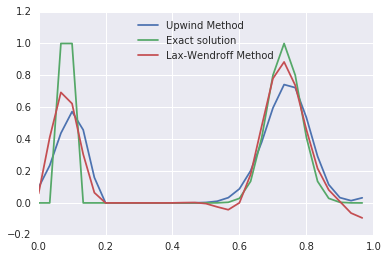

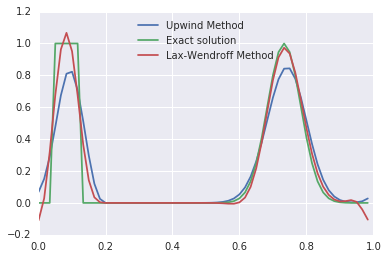

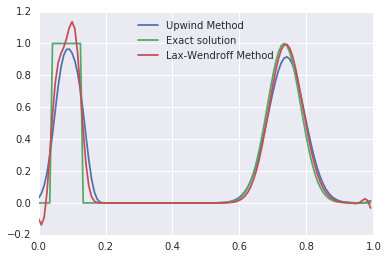

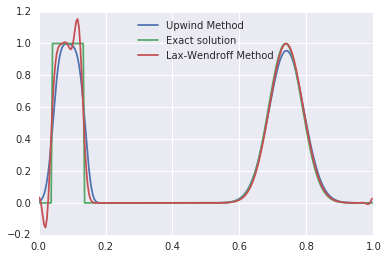

In [19]:
nx_list= [30, 60, 120, 240]

for nx in nx_list:
    nt = nx * 3 // 2
    x = np.linspace(0., 1., nx+1)[:-1]
    u0 = np.exp(-(x - .3)**2 / .005)
    arr = (.6 < x) & (x < .7 )
    u0[arr] += 1.
    # Run the simulation.
    lax_wendroff(u0, 1.2, 0, 1, 1.2, nt)

## Problem 2

In [24]:
def minmod(u0, a, xmin, xmax, t_final, nt):
    """ Solve the advection equation with periodic
    boundary conditions on the interval [xmin, xmax]
    using the upwind finite volume scheme.
    Use u0 as the initial conditions.
    a is the constant from the PDE.
    Use the size of u0 as the number of nodes in
    the spatial dimension.
    Let nt be the number of spaces in the time dimension
    (this is the same as the number of steps if you do
    not include the initial state).
    Plot and show the computed solution along
    with the exact solution. """
    dt = float(t_final) / nt
    # Since we are doing periodic boundary conditions,
    # we need to divide by u0.size instead of (u0.size - 1).
    dx = float(xmax - xmin) / u0.size
    lambda_ = a * dt / dx
    u = u0.copy()
    u_copy = u0.copy()
    u_copy2 = u0.copy()

    def minmod_func(a, b):
        vec = a.copy()
        for i in xrange(len(a)):
            if np.all(np.abs(a[i]) < np.abs(b[i])) and np.all(a[i]*b[i] > 0):
                vec[i] = a[i]
            elif np.all(np.abs(b[i]) < np.abs(a[i])) and np.all(a[i]*b[i] > 0):
                vec[i] = b[i]
            else:
                vec[i] = 0
        return vec
    
    for j in xrange(nt):
        # The Upwind method. The np.roll function helps us
        # account for the periodic boundary conditions.
        u -= lambda_ * (u - np.roll(u, 1))

        # My Minmod Code
        # ---------------------------------
        min_m1 = a * (np.roll(u_copy2, 1) + (minmod_func((np.roll(u_copy2, 1) - np.roll(u_copy2, 2))/dx,
                                                         (u_copy2 - np.roll(u_copy2, 1))/dx)/2) * (dx-a*dt))
        min_p1 = a * (u_copy2 + (minmod_func((u_copy2 - np.roll(u_copy2, 1))/dx,
                                           (np.roll(u_copy2,-1)-u_copy2)/dx)/2) * (dx-a*dt))
    
        u_copy2 = u_copy2 - (dt/dx) * (min_p1 - min_m1)
        # ---------------------------------
        
        # My Lax-Wendrof Code
        # ---------------------------------
        m_i = (np.roll(u_copy, -1) - u_copy) / dx
        mm_1 = (u_copy - np.roll(u_copy, 1)) / dx
        fm_1 = np.roll(u_copy, 1) + (mm_1/2) * (dx - (a*dt))
        fm_1 *= a
        fp_1 = u_copy + (m_i/2) * (dx - a * dt)
        fp_1 *= a
        u_copy = u_copy - (dt/dx) * (fp_1 - fm_1)
        # ---------------------------------
        
    # Get the x values for the plots.
    x = np.linspace(xmin, xmax, u0.size+1)[:-1]
    # Plot the computed solution.
    plt.plot(x, u, label='Upwind Method')
    # Find the exact solution and plot it.
    distance = a * t_final
    roll = int((distance - floor(distance)) * u0.size)
    plt.plot(x, np.roll(u0, roll), label='Exact solution')
    plt.plot(x, u_copy, label='Lax-Wendroff Method')
    # Show the plot with the legend.
    plt.legend(loc='best')
    plt.show()

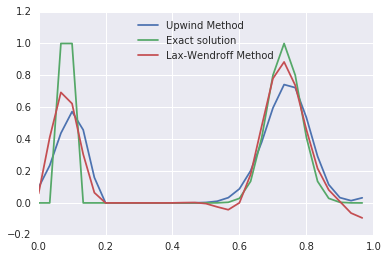

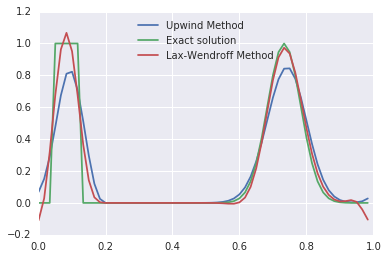

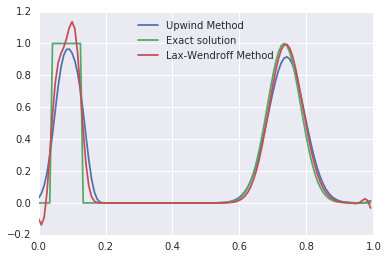

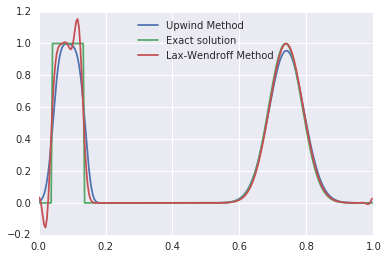

In [25]:
nx_list= [30, 60, 120, 240]

for nx in nx_list:
    nt = nx * 3 // 2
    x = np.linspace(0., 1., nx+1)[:-1]
    u0 = np.exp(-(x - .3)**2 / .005)
    arr = (.6 < x) & (x < .7 )
    u0[arr] += 1.
    # Run the simulation.
    minmod(u0, 1.2, 0, 1, 1.2, nt)